In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import statsmodels.api as sm

In [6]:
df = pd.read_csv('/Users/chris/Desktop/python_analysis_algo_trading/learning_numpy/jup/monthly-milk-production-pounds-p copy.csv')

In [7]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.columns = ['Month', 'Milk in Pounds per Cow']

In [9]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [10]:
df.drop(168,axis=0,inplace=True)

In [11]:
df['Month'] = pd.to_datetime(df['Month'])

In [12]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [13]:
df.set_index('Month',inplace=True)

In [14]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name='Month', length=168, freq=None)

In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


<AxesSubplot:xlabel='Month'>

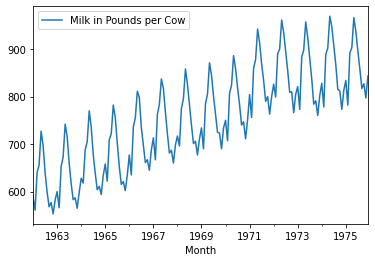

In [16]:
df.plot()

In [17]:
time_series = df['Milk in Pounds per Cow']

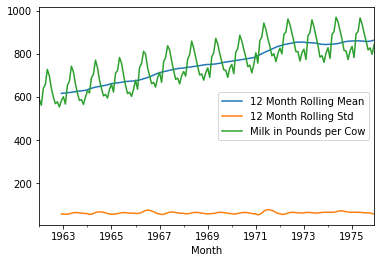

In [22]:
time_series.rolling(12).mean().plot(label='12 Month Rolling Mean')
time_series.rolling(12).std().plot(label='12 Month Rolling Std')
time_series.plot()
plt.legend()

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
decomp = seasonal_decompose(time_series)

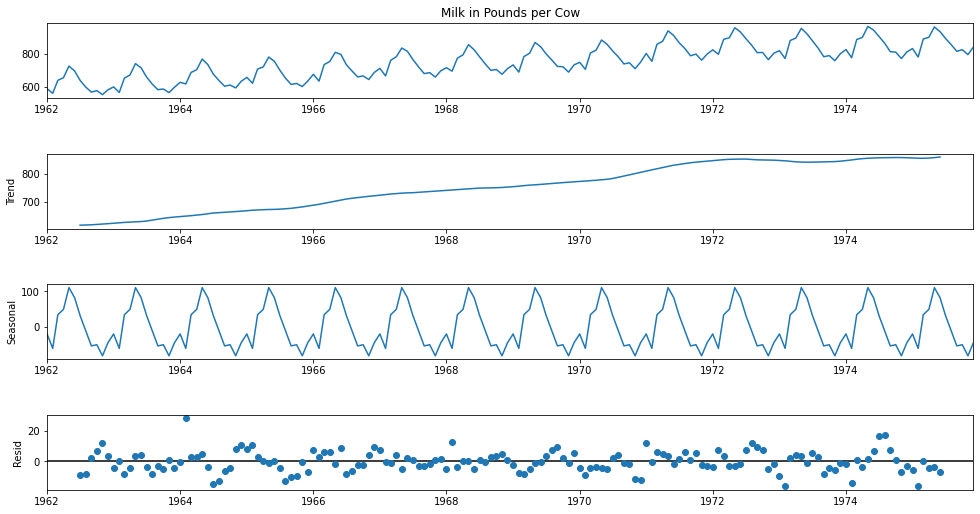

In [27]:
fig = decomp.plot()
fig.set_size_inches(15,8)

In [28]:
df.head()

,Milk in Pounds per Cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
result = adfuller(df['Milk in Pounds per Cow'])

In [33]:
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels = ['ADF Test Statistic', 'p-value', '# of lags', 'Num of Oberservations used']

    for value,label in zip(result,labels):
        print(label+ " : "+str(value))
    
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis")
        print("reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print('weak evidence against null hypothesis')
        print('Fail to reject null hypothesis')
        print('Data has a unit root, data is non-stationary')







In [34]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.3038115874221246
p-value : 0.627426708603034
# of lags : 13
Num of Oberservations used : 154
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, data is non-stationary


In [35]:
df['First Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(1)

<AxesSubplot:xlabel='Month'>

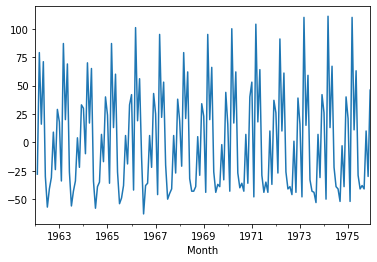

In [36]:
df['First Difference'].plot()

In [37]:
adf_check(df['First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.0549955586531095
p-value : 0.0300680040017824
# of lags : 14
Num of Oberservations used : 152
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [38]:
df['Milk Second Difference'] = df['First Difference'] - df['First Difference'].shift(1)

In [39]:
adf_check(df['Milk Second Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -14.327873645603345
p-value : 1.1126989332082667e-26
# of lags : 11
Num of Oberservations used : 154
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

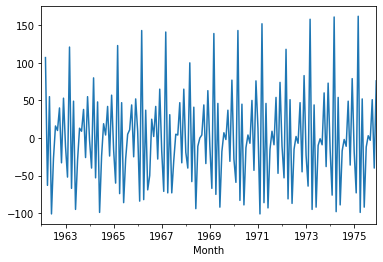

In [40]:
df['Milk Second Difference'].plot()

In [41]:
df['Seasonal Difference'] = df['Milk in Pounds per Cow'] - df['Milk in Pounds per Cow'].shift(12)

<AxesSubplot:xlabel='Month'>

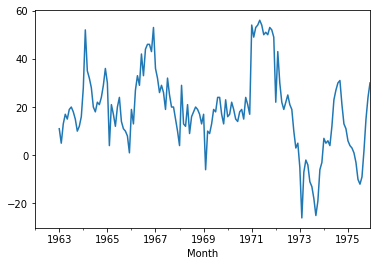

In [42]:
df['Seasonal Difference'].plot()

In [44]:
adf_check(df['Seasonal Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.335419314359397
p-value : 0.16079880527711382
# of lags : 12
Num of Oberservations used : 143
weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, data is non-stationary


In [45]:
df['Seasonal First Difference'] = df['First Difference'] - df['First Difference'].shift(12)

In [46]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.038002274921979
p-value : 1.865423431878876e-05
# of lags : 11
Num of Oberservations used : 143
Strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

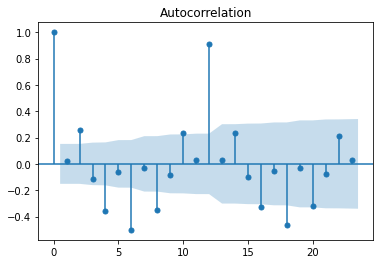

In [48]:
fig_first = plot_acf(df['First Difference'].dropna())

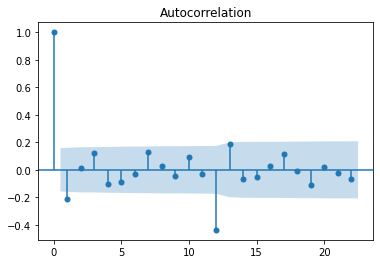

In [49]:
fig_seasonal_first = plot_acf(df['Seasonal First Difference'].dropna())

In [50]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

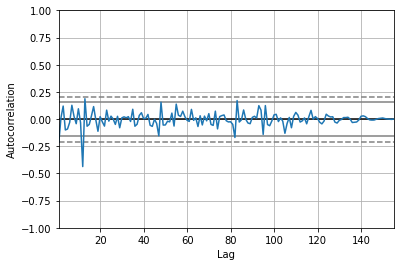

In [51]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

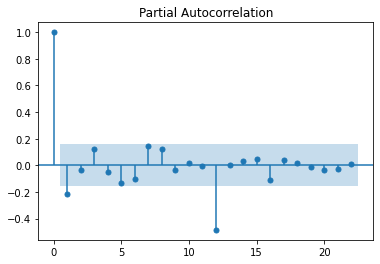

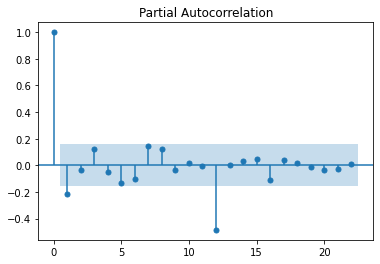

In [52]:
plot_pacf(df['Seasonal First Difference'].dropna())

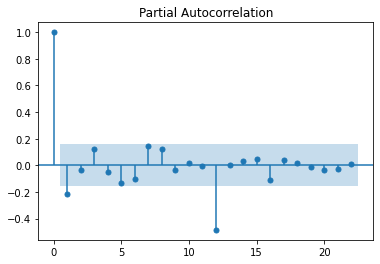

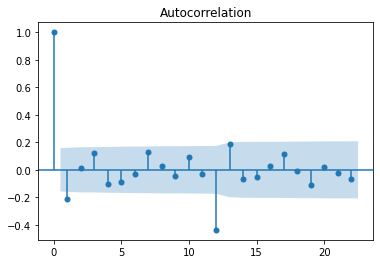

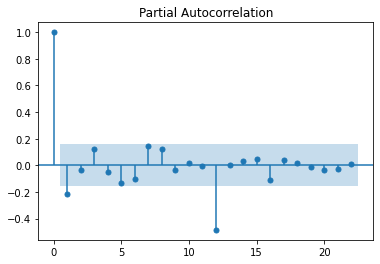

In [53]:
plot_acf(df['Seasonal First Difference'].dropna())
plot_pacf(df['Seasonal First Difference'].dropna())

In [54]:
from statsmodels.tsa.arima_model import ARIMA

In [55]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

In [56]:
model = sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

/Users/chris/Desktop/python_analysis_algo_trading/learning_numpy/jup/savenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/chris/Desktop/python_analysis_algo_trading/learning_numpy/jup/savenv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [59]:
results = model.fit()

In [60]:
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Thu, 18 Mar 2021   AIC                           1074.131
Time:                                      11:01:07   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

<AxesSubplot:xlabel='Month'>

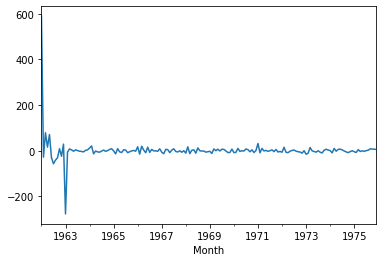

In [62]:
results.resid.plot()

<AxesSubplot:ylabel='Density'>

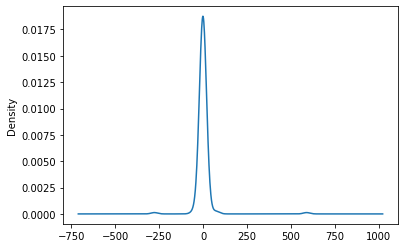

In [63]:
results.resid.plot(kind='kde')

<AxesSubplot:xlabel='Month'>

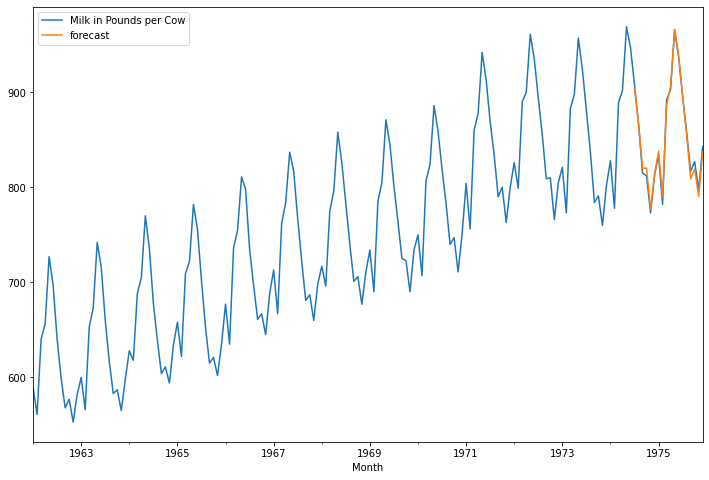

In [64]:
df['forecast'] = results.predict(start=150,end=168)
df[['Milk in Pounds per Cow', 'forecast']].plot(figsize=(12,8))

In [65]:
df.tail()

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358648
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841371
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323185
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427530
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063622


In [66]:
from pandas.tseries.offsets import DateOffset

In [67]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1,24)]

In [68]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [69]:
future_df = pd.DataFrame(index=future_dates,columns=df.columns)

,Milk in Pounds per Cow,First Difference,Milk Second Difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
final_df = pd.concat([df,future_dates])

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid